In [98]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [99]:
Stocks= ["ITC.NS"]

In [100]:
S= "ITC.NS"

In [101]:
Pkl_Filename = "ITC_Model.pkl"
sc_file= "ITC_sc.pkl"
global sc
with open(Pkl_Filename, 'rb') as file:  
    regressor = pickle.load(file)

with open(sc_file, 'rb') as file:  
    sc = pickle.load(file)
        
stk = yf.Ticker(S)
df= stk.history(period="10y")
df.iloc[:,0:5].to_csv(S+".csv")


In [102]:
df = pd.read_csv(S+".csv",index_col="Date",parse_dates=True)

In [103]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-10-26,87.533456,89.074986,86.890639,88.252579,9176379
2010-10-27,88.252584,88.329659,85.914856,86.248596,7460368
2010-10-28,86.916848,88.227152,84.784143,85.837776,34655488
2010-10-29,86.890639,88.329655,85.144087,87.969711,27593872
2010-11-01,88.637970,89.152070,87.790130,88.304230,12801544


In [20]:
df= df[['Open']]
training_df= df[:int(len(df)*(4/5))]
testing_df= df[int(len(df)*(4/5)):]

In [21]:
testing_df= sc.transform(testing_df)

In [22]:
X_test = []
y_test = []
for i in range(60, len(testing_df)-4):
    X_test.append(testing_df[i-60:i])
    y_test.append(testing_df[i+4, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

In [24]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [25]:
predicted_stock_price = regressor.predict(X_test)

In [26]:
y_test= np.reshape(y_test, (y_test.shape[0], 1))
y_test.shape

(429, 1)

In [27]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
actual_stock_price = sc.inverse_transform(y_test)

In [43]:
df = pd.read_csv(S+".csv",index_col="Date",parse_dates=True)
df= df[['Open']]

In [44]:
df= df[int(len(df)*(4/5))+64:]

In [45]:
df.tail()

,Open
Date,
2020-10-20,168.000000
2020-10-21,168.149994
2020-10-22,167.550003
2020-10-23,168.949997
2020-10-26,171.500000


In [33]:
pred_df=pd.DataFrame(predicted_stock_price)
pred_df

,0
0,270.402985
1,269.543610
2,268.218048
3,267.702118
4,264.226929
...,...
424,171.780487
425,172.293106
426,171.856308
427,170.417358


In [38]:
predicted_stock_price.shape

(429, 1)

In [46]:
df.shape

(429, 1)

In [47]:
df['Open2']= predicted_stock_price

In [48]:
df.tail()

,Open,Open2
Date,,
2020-10-20,168.000000,171.780487
2020-10-21,168.149994,172.293106
2020-10-22,167.550003,171.856308
2020-10-23,168.949997,170.417358
2020-10-26,171.500000,168.994415


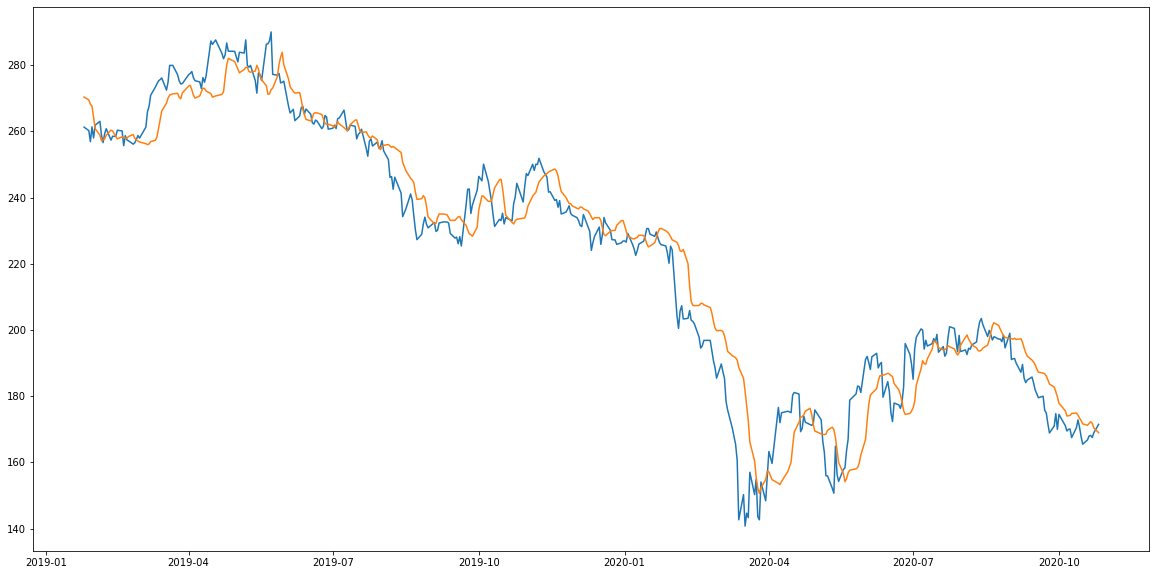

In [49]:
plt.figure(figsize=(20,10))
plt.plot(df['Open'])
plt.plot(df['Open2'])

In [104]:
week_df= df[-65:]
week_df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-07-27,200.500000,200.500000,195.149994,196.399994,22645697
2020-07-28,197.000000,198.649994,195.050003,195.399994,19287132
2020-07-29,193.449997,198.199997,193.399994,196.699997,14831635
2020-07-30,198.399994,198.399994,192.500000,193.350006,16315231
2020-07-31,193.500000,196.949997,193.500000,194.149994,16652851


In [105]:
week_df= week_df['Open']

In [106]:
week_df.head()

Date
2020-07-27    200.500000
2020-07-28    197.000000
2020-07-29    193.449997
2020-07-30    198.399994
2020-07-31    193.500000
Name: Open, dtype: float64

In [107]:
X_test = []
y_test = []
for i in range(60, len(week_df)):
    X_test.append(week_df[i-60:i])
X_test = np.array(X_test)

In [108]:
X_test

array([[200.5       , 197.        , 193.44999695, 198.3999939 ,
        193.5       , 194.        , 192.6000061 , 194.5       ,
        194.19999695, 195.5       , 196.3999939 , 200.        ,
        202.5       , 203.5       , 201.6000061 , 198.05000305,
        199.8999939 , 198.6000061 , 197.        , 198.        ,
        197.25      , 197.25      , 196.5       , 198.5       ,
        194.6000061 , 199.        , 191.1000061 , 191.30000305,
        191.3999939 , 190.        , 187.25      , 189.6000061 ,
        185.5       , 184.1000061 , 184.8999939 , 185.80000305,
        184.        , 181.8500061 , 180.80000305, 179.55000305,
        180.        , 175.75      , 174.94999695, 171.69999695,
        168.8999939 , 171.        , 174.75      , 170.        ,
        174.5       , 171.1000061 , 169.5       , 170.        ,
        170.1000061 , 167.5       , 170.5       , 172.8500061 ,
        170.55000305, 167.69999695, 165.5       , 166.80000305],
       [197.        , 193.44999695, 198

In [109]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [110]:
predicted_stock_price

array([[653.8073 ],
       [653.81775],
       [653.8271 ],
       [653.8384 ],
       [653.8388 ]], dtype=float32)

In [83]:
week_df.head()

Date
2020-07-27    200.500000
2020-07-28    197.000000
2020-07-29    193.449997
2020-07-30    198.399994
2020-07-31    193.500000
Name: Open, dtype: float64

In [84]:
week_df.shape

(65,)

In [93]:
pred_df= pd.DataFrame(predicted_stock_price, columns=['Open'])
pred_df.head()

,Open
0,653.807312
1,653.817749
2,653.827087
3,653.838379
4,653.838806


In [86]:
week_df.append(pred_df)

,0,Open
2020-07-27 00:00:00,200.500000,NaN
2020-07-28 00:00:00,197.000000,NaN
2020-07-29 00:00:00,193.449997,NaN
2020-07-30 00:00:00,198.399994,NaN
2020-07-31 00:00:00,193.500000,NaN
...,...,...
0,NaN,653.807312
1,NaN,653.817749
2,NaN,653.827087
3,NaN,653.838379
